/usr/local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=6169.589, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6396.650, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6390.442, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6385.402, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=6177.756, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6167.594, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6277.269, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=6312.727, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=6169.590, Time=0.66 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=6274.236, Time=0.20 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=6170.914, Time=1.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6169.522, Time=1.45 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 5.985 seconds


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


result : 
1781    22.433985
1782    22.281259
1783    22.267696
1784    22.186931
1785    22.138960
1786    22.075329
1787    22.019515
1788    21.960142
1789    21.902722
1790    21.844584
1791    21.787020
Name: predicted_mean, dtype: float64


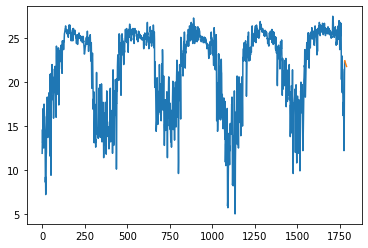

In [7]:
import pandas as pd

# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# 상대경로
def load_csv(_file_name: str, _index_col: str):
    df = pd.read_csv(_file_name)
    df.set_index(_index_col)
    return df

def defferencing_data(_df, _col: str):
    diff_df = _df.copy()
    diff_df = diff_df[_col].diff().dropna()
    return diff_df

def optimize_order(_df):
    return auto_arima(_df,  seasonal=False, m=12, trace=True, suppress_warnings=True)

def train(_df, _col, _order):
    # ARIMA 모델 정의 및 학습
    model = SARIMAX(_df[_col], order=_order.order, seasonal_order=_order.seasonal_order)
    # 모델 훈련
    model_fit = model.fit()
    return model_fit

def forecast(_model: SARIMAX, _start: int, _amount: int) -> pd.core.series.Series:
    _forecast = _model.predict(start=_start, end=_amount)
    return _forecast

def prediction(_df: str, _col: str, _index_col: str, _amount: float):
    df = load_csv(_df, _index_col)
    diff_df = defferencing_data(df, _col)
    best_order = optimize_order(diff_df)
    model = train(df, _col, best_order)
    result = forecast(model, len(df), int(len(df)+_amount))

    df[_col].plot()
    result.plot()

    return result


result = prediction("/workspace/Forage/python-kata/modules/prediction/arima_train - full.csv", "dew", "datetime", 10)
print(f'result : \n{result}')
    